# COMP541 Project data_prepartion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd 
import numpy as np

database1 = pd.read_csv("fraudTrain.csv")
database2 = pd.read_csv("fraud_data.csv")

print(database1.head())
print(database2.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [3]:
print(database1.info())
print(database2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Data information
### Database1 (fraudTrain.csv)
- contains 1,296,675 tuples (rows) and 23 attributes (columns)
- it is a much larger dataset than database2
- Non-null count shows that there is no column with a missing value

### Database2 (fraud_data.csv)
- contains 14,446 tuples (rows) and 15 attributes (columns)
- Non-null count also shows that all columns have a value

## Find duplicates in both datasets

In [6]:
print("Number of duplicates in database1: ", database1.duplicated().sum())
print("Number of duplicates in database2: ", database2.duplicated().sum())

Number of duplicates in database1:  0
Number of duplicates in database2:  63


In [7]:
#Get more information on duplicates
duplicate_rows = database2[database2.duplicated(keep=False)]
print(duplicate_rows)

      trans_date_trans_time                          merchant        category  \
0          04-01-2019 00:58  "Stokes, Christiansen and Sipes"     grocery_net   
1          04-01-2019 15:06                      Predovic Inc    shopping_net   
2          04-01-2019 22:37                   Wisozk and Sons        misc_pos   
3          04-01-2019 23:06                    Murray-Smitham     grocery_pos   
4          04-01-2019 23:59                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
13261      18-01-2019 14:38                    Shanahan-Lehne   personal_care   
13372      18-01-2019 22:06                         Beier LLC   entertainment   
13376      18-01-2019 22:12               Bartoletti and Sons   personal_care   
13392      18-01-2019 23:16                 Ankunding-Carroll          travel   
13396      18-01-2019 23:31                      Wilkinson Lt   entertainment   

          amt      city sta

In [8]:
database2 = database2.drop_duplicates()
print("Number of duplicates in database2: ", database2.duplicated().sum())

Number of duplicates in database2:  0


## Duplicate Findings
### Dataset 1
- no duplicates were found
### Dataset 2
- 63 duplicates were found
- printed out more information to see validate they are duplicates
- 126 rows were returned meaning that there were two of the same records (63 duplicates)
- dropped the duplicated values
- verified the duplicates values are no longer in the dataset

In [10]:
# Concatenate database1 and database2
combined_data = pd.concat([database1, database2], ignore_index=True)
combined_data.info()

# validate databases were combined correctly
print(combined_data.head())
print(combined_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311058 entries, 0 to 1311057
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  float64
 1   trans_date_trans_time  1311058 non-null  object 
 2   cc_num                 1296675 non-null  float64
 3   merchant               1311058 non-null  object 
 4   category               1311058 non-null  object 
 5   amt                    1311058 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1311058 non-null  object 
 11  state                  1311058 non-null  object 
 12  zip                    1296675 non-null  float64
 13  lat                    1311058 non-null  float64
 14  long              

In [11]:
# check for duplicates again
print("Number of duplicates in combined data set: ", combined_data.duplicated().sum())

Number of duplicates in combined data set:  0


In [12]:
# look at perecnt of null values for each column
combined_data.isnull().sum()/combined_data.shape[0]*100

Unnamed: 0               1.097053
trans_date_trans_time    0.000000
cc_num                   1.097053
merchant                 0.000000
category                 0.000000
amt                      0.000000
first                    1.097053
last                     1.097053
gender                   1.097053
street                   1.097053
city                     0.000000
state                    0.000000
zip                      1.097053
lat                      0.000000
long                     0.000000
city_pop                 0.000000
job                      0.000000
dob                      0.000000
trans_num                0.000000
unix_time                1.097053
merch_lat                0.000000
merch_long               0.000000
is_fraud                 0.000000
dtype: float64

## Combined datasets
### Combined_data info
- 1,311,058 tuples and 23 attributes
- there are non-null values in some columns, because database2 did not have those columns
### Duplicates in combined_data
- there are no duplicates when database1 and database2 were concatenated
### Non-null values
- about 1.01 percent of data is missing from the following attributes:
  - Unamed: 0
  - cc_num
  - first
  - last
  - gender
  - street
  - zip
  - unix_time
## Data Reduction
### Removing unnecessary attributes
- **Unnamed: 0** which is just an index column
- **first** is the first name of credit card holder
- **last** is the last name of credit card holder
- **gender** of credit card holder
- **street** refers to the street address of credit card holder
- **zip** of where the credit card holder lives
- **job** of credit card holder
- **dob** of credit card holder
#### Each of these columns does not relate to the target variable is_fraud

In [14]:
columns_to_drop = ["Unnamed: 0", "first", "last", "gender", "street", "zip", "job", "dob"]
combined_data = combined_data.drop(columns=columns_to_drop)

#print info of combined_data that is now reduced
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311058 entries, 0 to 1311057
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1311058 non-null  object 
 1   cc_num                 1296675 non-null  float64
 2   merchant               1311058 non-null  object 
 3   category               1311058 non-null  object 
 4   amt                    1311058 non-null  float64
 5   city                   1311058 non-null  object 
 6   state                  1311058 non-null  object 
 7   lat                    1311058 non-null  float64
 8   long                   1311058 non-null  float64
 9   city_pop               1311058 non-null  int64  
 10  trans_num              1311058 non-null  object 
 11  unix_time              1296675 non-null  float64
 12  merch_lat              1311058 non-null  float64
 13  merch_long             1311058 non-null  float64
 14  is_fraud          

## Normalizing Data
### The following numerical attributes are going to be normalized:
- amt
- lat
- long
- merch_lat
- merch_long

<p>Amt will be normalized because the price of a transaction can vary significantly. There could be very small transaction amounts as well as larger amounts. The latitude and longitude attributes will also be normalized because it will improve our models perfermance if we end up using distance calculating algoritms.</p>

In [16]:
# normalize amt data into range [0,1]
scaler = MinMaxScaler()
combined_data['amt'] = scaler.fit_transform(combined_data[['amt']])

# normalize geoprahical location data from [-1,1]
scaler = MinMaxScaler(feature_range=(-1,1))
combined_data['lat'] = scaler.fit_transform(combined_data[['lat']])
combined_data['long'] = scaler.fit_transform(combined_data[['long']])
combined_data['merch_lat'] = scaler.fit_transform(combined_data[['merch_lat']])
combined_data['merch_long'] = scaler.fit_transform(combined_data[['merch_long']])

# verify that data is normalized
print(combined_data[['amt','lat', 'long', 'merch_lat', 'merch_long']].describe())

                amt           lat          long     merch_lat    merch_long
count  1.311058e+06  1.311058e+06  1.311058e+06  1.311058e+06  1.311058e+06
mean   2.415565e-03 -2.061085e-01  5.394665e-01 -1.946375e-01  5.286486e-01
std    5.572722e-03  2.176967e-01  2.848138e-01  2.109466e-01  2.793441e-01
min    0.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00
25%    2.991581e-04 -3.724880e-01  4.042160e-01 -3.513665e-01  3.951605e-01
50%    1.608407e-03 -1.716831e-01  5.954831e-01 -1.608809e-01  5.851575e-01
75%    2.842002e-03 -6.084918e-02  7.498025e-01 -5.401014e-02  7.320619e-01
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00


<p>As can be seen above, the min and max value of each of these attributes falls into the range [-1,1]</p>

## Sample of how our preprocessed data looks like

In [19]:
combined_data.info()
print(combined_data.head())
print(combined_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311058 entries, 0 to 1311057
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1311058 non-null  object 
 1   cc_num                 1296675 non-null  float64
 2   merchant               1311058 non-null  object 
 3   category               1311058 non-null  object 
 4   amt                    1311058 non-null  float64
 5   city                   1311058 non-null  object 
 6   state                  1311058 non-null  object 
 7   lat                    1311058 non-null  float64
 8   long                   1311058 non-null  float64
 9   city_pop               1311058 non-null  int64  
 10  trans_num              1311058 non-null  object 
 11  unix_time              1296675 non-null  float64
 12  merch_lat              1311058 non-null  float64
 13  merch_long             1311058 non-null  float64
 14  is_fraud          

# Data Visualization

In [21]:
print(combined_data.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'city', 'state', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [22]:
print(combined_data.city)



0          Moravian Falls
1                  Orient
2              Malad City
3                 Boulder
4                Doe Hill
                ...      
1311053            Athena
1311054          Gardiner
1311055              Alva
1311056             Wales
1311057        Unionville
Name: city, Length: 1311058, dtype: object


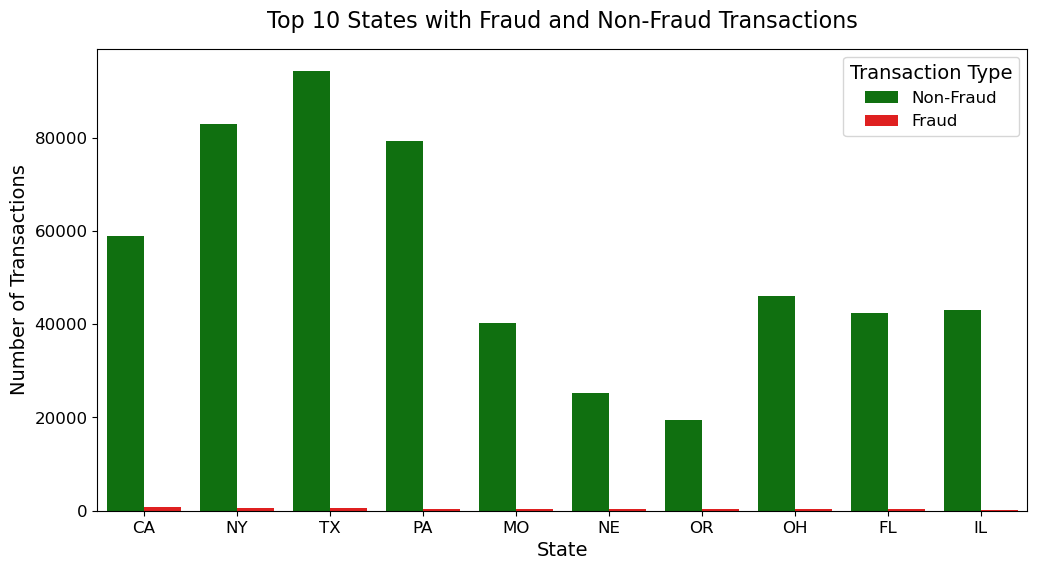

In [23]:
import re
# re because of corruption
# Clean the is_fraud column to extract only 0s and 1s bc of corruption
combined_data['is_fraud'] = combined_data['is_fraud'].apply(lambda x: int(re.search(r'\d', str(x)).group(0)))

# Transactions by state and fraud status
state_fraud_data = combined_data.groupby(['state', 'is_fraud']).size().reset_index(name = 'transaction_count')

# Pivot the data to get fraud and nonfraud counts in separate columns
# pivot_data_
pivot_data = state_fraud_data.pivot(index = 'state', columns = 'is_fraud', values = 'transaction_count').fillna(0)

# Rename columns
pivot_data.columns = ['Non-Fraud', 'Fraud']

# Sort by fraud count and top 10 states
top_10_states = pivot_data.sort_values(by = 'Fraud', ascending = False).head(10).reset_index()

# Melt data for easier plotting
melted_data = top_10_states.melt(id_vars='state', value_vars = ['Non-Fraud', 'Fraud'], var_name = 'Transaction Type', value_name = 'Count')

# Plot bars
plt.figure(figsize = (12, 6))

# Colors
palette = {'Non-Fraud': 'green', 'Fraud': 'red'}

sns.barplot(data = melted_data, x = 'state', y = 'Count', hue = 'Transaction Type', palette = palette)

# Title, labels, ticks
plt.title('Top 10 States with Fraud and Non-Fraud Transactions', fontsize = 16, pad = 15)
plt.xlabel('State', fontsize = 14)
plt.ylabel('Number of Transactions', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Legend
plt.legend(title = 'Transaction Type', fontsize = 12, title_fontsize = 14)

# Print Graph
plt.show()


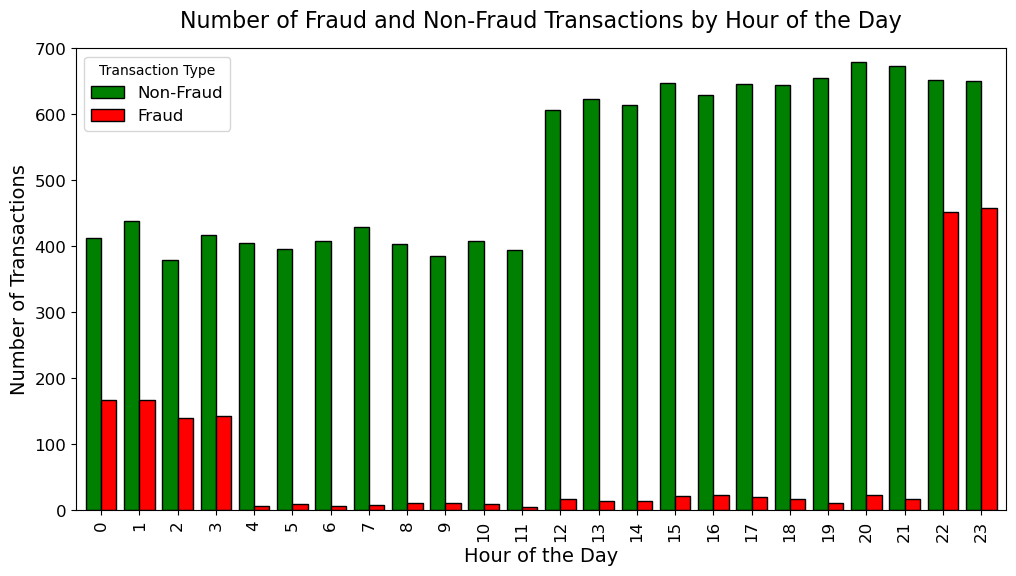

In [24]:
# Change trans_date_trans_time column to datetime with correct format
combined_data['trans_date_trans_time'] = pd.to_datetime(combined_data['trans_date_trans_time'], format = '%d-%m-%Y %H:%M', errors = 'coerce')

# INvalid stamps
combined_data = combined_data.dropna(subset = ['trans_date_trans_time'])

# Get the hours from the timestamps
combined_data['hour'] = combined_data['trans_date_trans_time'].dt.hour

# Put hour and fraud statustogether and count transactions
hourly_fraud_data = combined_data.groupby(['hour', 'is_fraud']).size().reset_index(name = 'transaction_count')

# Separate columns for fraud and nonfraud transactions
pivot_data = hourly_fraud_data.pivot(index = 'hour', columns = 'is_fraud', values = 'transaction_count').fillna(0)
pivot_data.columns = ['Non-Fraud', 'Fraud']  # Rename the columns for clarity

# Plot bars
plt.figure(figsize = (12, 6))
pivot_data.plot(kind = 'bar', stacked = False, color = ['green', 'red'], width = 0.8, edgecolor = 'black', ax = plt.gca())

# Title, labels, axis
plt.title('Number of Fraud and Non-Fraud Transactions by Hour of the Day', fontsize = 16, pad = 15)
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Number of Transactions', fontsize = 14)
plt.ylim(0, 700)
plt.xticks(ticks = range(0, 24), labels = range(0, 24), fontsize = 12)
plt.yticks(fontsize = 12)

# Legend
plt.legend(title = 'Transaction Type', labels = ['Non-Fraud', 'Fraud'], fontsize = 12)

# Print Graph
plt.show()


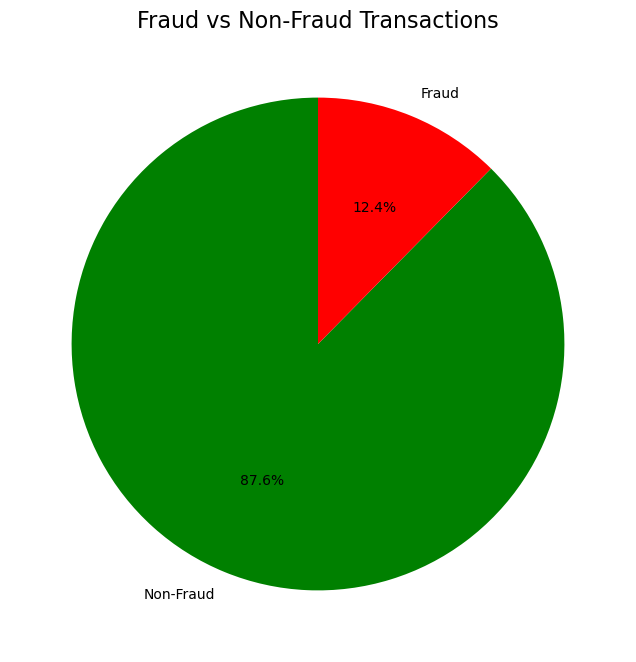

In [25]:
# Counts transactions
fraud_counts = combined_data['is_fraud'].value_counts()

# Labels, colors
labels = ['Non-Fraud', 'Fraud']
colors = ['green', 'red']

# Plot Pie chart
plt.figure(figsize = (8, 8))
plt.pie(fraud_counts, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
plt.title('Fraud vs Non-Fraud Transactions', fontsize = 16)

# Print graph
plt.show()


<Figure size 1000x1000 with 0 Axes>

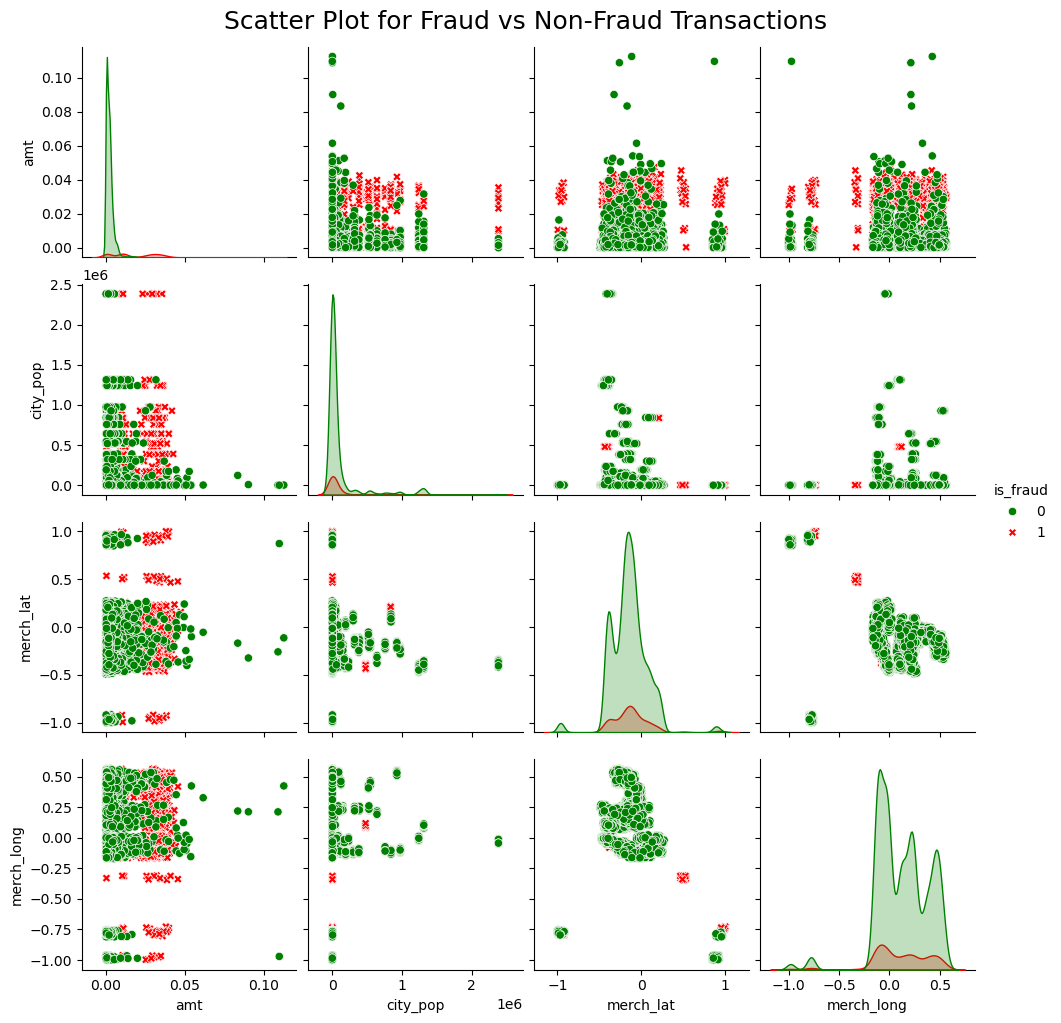

In [26]:
# choose columns
features = combined_data[['amt', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']]

# Change is_fraud type for coloring
features.loc[:, 'is_fraud'] = features['is_fraud'].astype(int)

# Create scatter plot
plt.figure(figsize = (10, 10))
sns.pairplot(features, hue = 'is_fraud', palette = {0: 'green', 1: 'red'}, markers = ['o', 'X'])

# Title
plt.suptitle('Scatter Plot for Fraud vs Non-Fraud Transactions', fontsize = 18, y = 1.02)

# Print graph
plt.show()

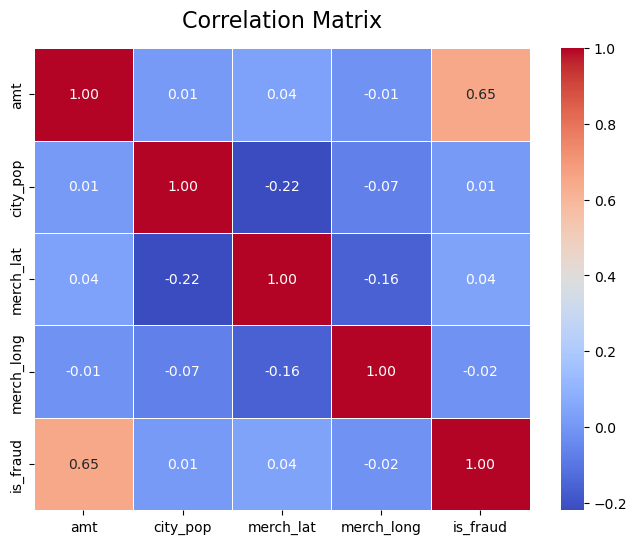

In [27]:
# Choose features for graph
num_data = combined_data[['amt', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']].copy()

# Correlation matrix
corr_mat = num_data.corr()

# Print graph
plt.figure(figsize = (8, 6))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix', fontsize = 16, pad = 15)
plt.show()


## Correlation Matirx
<p>Shows a weak correlation between is_fraud and city_population. Therefore we will remove this attribute as it serves no purpose in helping us find out target variable, is_fraud. Merch_lat and merch_long show weak correlation but they can still be of use for models that use distance calculating algorithms. </p>

In [29]:
# drop city_pop attribute
combined_data = combined_data.drop(columns="city_pop")

# confirm the column is dropped
print(combined_data.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'city', 'state', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'hour'],
      dtype='object')


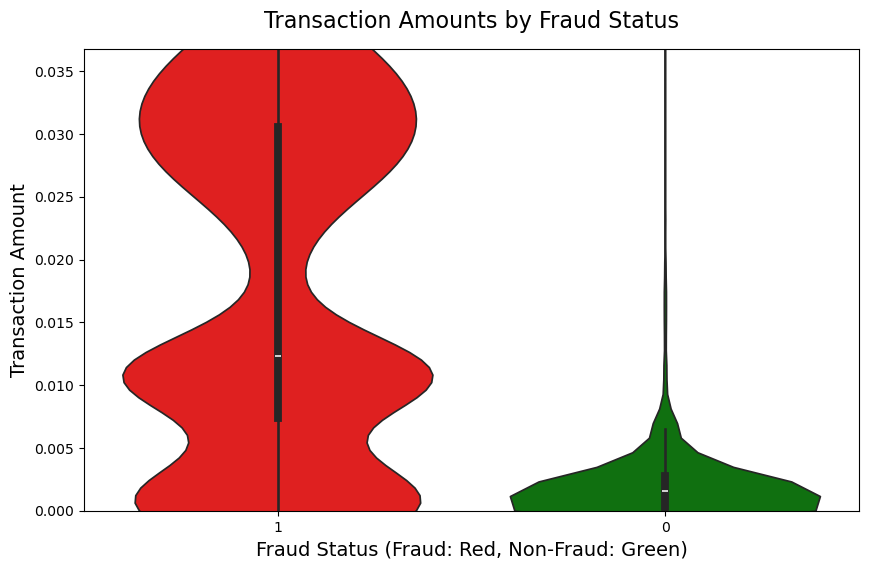

In [30]:
# change is_fraud to string to make it easier
combined_data['is_fraud'] = combined_data['is_fraud'].astype(str)

# Ccreate violin plot
plt.figure(figsize = (10, 6))
sns.violinplot(data = combined_data, x = 'is_fraud', y = 'amt', hue = 'is_fraud', palette = {'0': 'green', '1': 'red'}, legend = False)

# Title, labels
plt.title('Transaction Amounts by Fraud Status', fontsize = 16, pad = 15)
plt.xlabel('Fraud Status (Fraud: Red, Non-Fraud: Green)', fontsize = 14)
plt.ylabel('Transaction Amount', fontsize = 14)
plt.ylim(0, combined_data['amt'].quantile(0.99))

# print graph
plt.show()
